In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Read files into DataFrames
customers_df = pd.read_csv("/content/Customers (1).csv")
products_df = pd.read_csv("/content/Products (1).csv")
transactions_df = pd.read_csv("/content/Transactions.csv")




In [ ]:
print(customers_df)
print(products_df)
print(transactions_df)


    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]
   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44

In [ ]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')

In [ ]:
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           -------

In [ ]:
# Insight 1 Region with the highest number of customers
region_counts = customers_df['Region'].value_counts()
top_region = region_counts.idxmax()
print(f"The region with the highest number of customers is {top_region} with {region_counts[top_region]} customers.")

# Insight 2 Most popular product category
category_counts = products_df['Category'].value_counts()
top_category = category_counts.idxmax()
print(f"The most popular product category is {top_category} with {category_counts[top_category]} products.")

# Insight 3 Average transaction value
avg_transaction_value = transactions_df['TotalValue'].mean()
print(f"The average transaction value is ${avg_transaction_value:.2f}.")

# Insight 4 Peak sales month
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()
peak_month = monthly_sales.idxmax()
peak_sales = monthly_sales.max()
print(f"The peak sales month is {peak_month} with total sales of ${peak_sales:.2f}.")

# Insight 5 Preferred purchase quantity
quantity_counts = transactions_df['Quantity'].value_counts()
top_quantity = quantity_counts.idxmax()
print(f"The most common purchase quantity is {top_quantity} units, indicating bulk purchases are preferred.")


The region with the highest number of customers is South America with 59 customers.
The most popular product category is Books with 26 products.
The average transaction value is $690.00.
The peak sales month is 2024-07 with total sales of $71366.39.
The most common purchase quantity is 4 units, indicating bulk purchases are preferred.


<ipython-input-9-ebe47aec5588>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', palette='pastel')


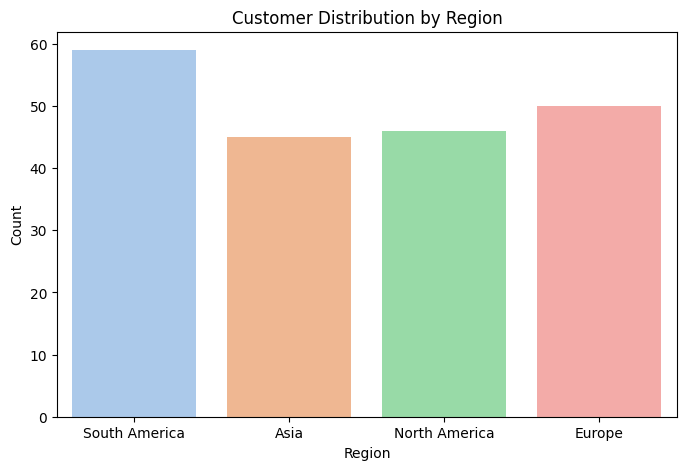

<ipython-input-9-ebe47aec5588>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x='Category', palette='muted')


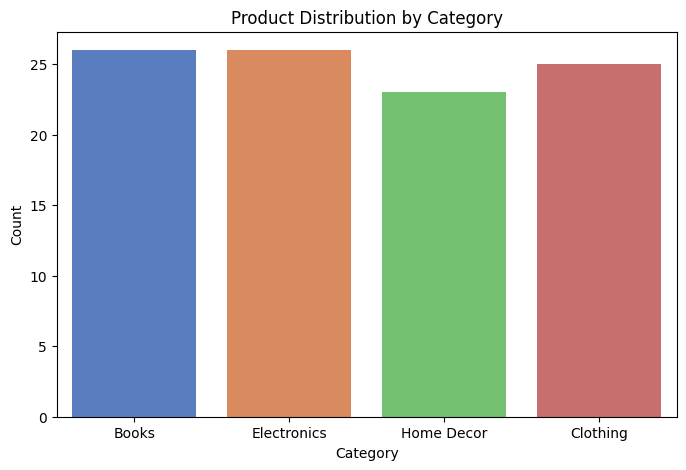

In [ ]:
# Visualizations
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='Region', palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=products_df, x='Category', palette='muted')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()





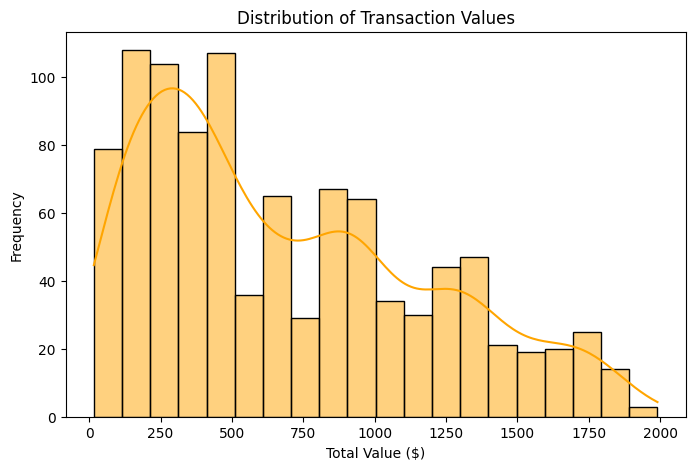

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions_df['TotalValue'], kde=True, bins=20, color='orange')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value ($)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-0f578eb793a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_category, x='Category', y='Price', palette='Blues_d')


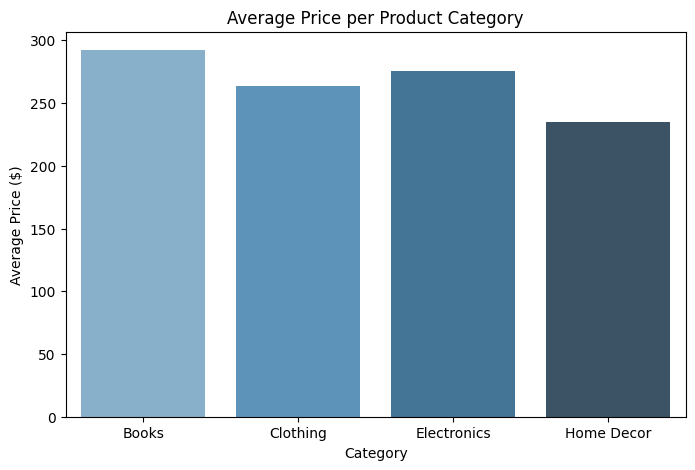

In [ ]:
avg_price_per_category = products_df.groupby('Category')['Price'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_per_category, x='Category', y='Price', palette='Blues_d')
plt.title('Average Price per Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.show()

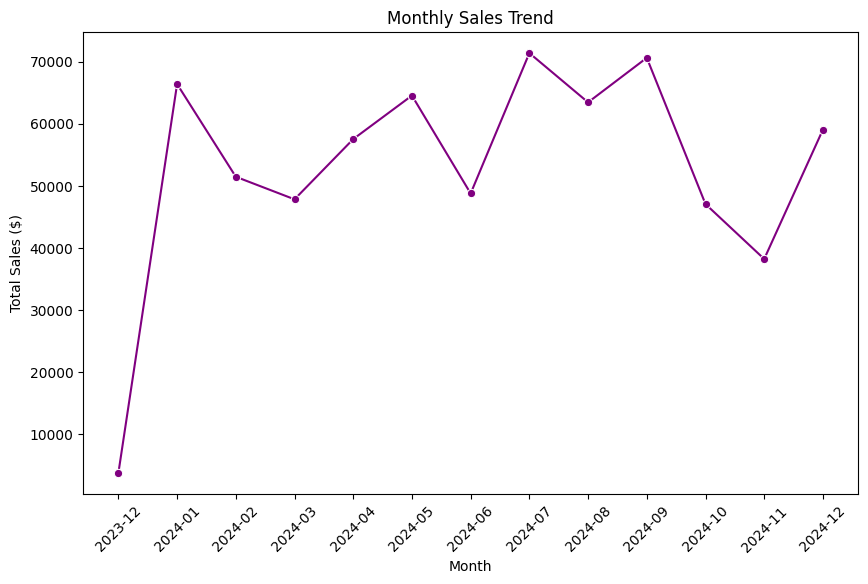

In [ ]:
# Existing code
plt.figure(figsize=(10, 6))
monthly_sales_df = monthly_sales.reset_index()
# The 'Month' column may be of type Period. Convert it to string for Seaborn
monthly_sales_df['Month'] = monthly_sales_df['Month'].astype(str)
sns.lineplot(data=monthly_sales_df, x='Month', y='TotalValue', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()